In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

<!DOCTYPE html>
<html>

<body>

<h1><center>Customer Churn Prediction</center></h1> 
<h4><center>Vasil Kichukov</center></h4>

</body>
</html>

## Abstract ##

##### What is Customer Churn? #####
Customer churn means customers leaving a company's product or service, often because of competition. It's like people choosing another company over the one they're using. The goal of churn analysis is to figure out which customers might leave and take steps to stop them.

##### Why is Churn Analysis Important? #####
Understanding and preventing customer churn is crucial, especially in businesses like insurance, telecom, or banking, where they earn money through subscriptions. Getting new customers is way more expensive than keeping the ones you already have. Churn analysis helps businesses study customer patterns, predict who might leave, and take action to keep them.

##### How Does Churn Affect Businesses? #####
In industries like insurance and telecom, where they make money from subscriptions, having lots of active customers is key. The number of customers affects things like costs, profits, size, and how much money the business can invest. Research shows that long-term customers are more profitable. They use methods like Customer Lifetime Value (CLV/CLTV) to understand this profitability.

##### How Can Businesses Keep Customers? #####
To keep customers, businesses need to understand why they stay or leave. Churn analysis helps them identify potential problems early on. In businesses with subscription models, keeping customers is vital for success. Long-term customers bring more profits. By using methods like CLV/CLTV, businesses can figure out how valuable each customer is and take steps to make them happy and loyal.

### Table of Contents

* [1. Dataset Representation](#Description)
* [2. Reading, Tidying and Cleaning](#Reading)
* [3. Understanding and Visualizing](#Visualizing)
* [4. Outliers Detection](#Outliers)
* [5. Preprocessing](#Preprocessing)
* [6. Model Selection](#Model)
    * [6.1. Logistic Regression](#Logistic)
    * [6.2. K-Nearest Neighbors](#Neighbors)
    * [6.3. Support Vector Machines](#SVM)
    * [6.4. Random Forest](#Forest)
    * [6.5. XGBoost Classifier](#XGBoost)
* [7. Feature Engineering](#Engineering)
    * [7.1. Remove attributes](#Remove)
    * [7.2. Create attributes](#Create) 
    * [7.3. Test attributes](#Test)
* [8. Final models](#Final)
    * [8.1. Logistic Regression](#Logistic_two)
    * [8.2. Support Vector Machines](#SVM_two)
    * [8.3. Random Forest](#Forest_two)
* [9. Conclusion](#Conclusion)
* [10. References](#References)

## Introduction 

##### About the Data: #####
In this dataset, our focus is on predicting customer churn in the telecommunications industry. Each entry in the dataset represents a customer, providing a wealth of information ranging from demographic details to service usage patterns and features reflecting customer loyalty. The primary goal is to scrutinize these features and understand how they contribute to predicting whether a customer will churn or stay with the service provider.

##### Why This Dataset Matters: #####
The dataset emerges as a powerful instrument in unraveling the intricacies of customer churn. Categorizing customers based on their churn status, demarcated by a label signaling whether they've parted ways with the service provider, opens up avenues for extensive analysis. This exploration transcends merely identifying those who leave; it's a journey into leveraging this understanding to enhance customer services and refine marketing strategies. The objective is to gain deeper insights, enrich the decision-making process, foster a proactive approach to customer retention, and adapt to the rapidly evolving landscape of digital customer relationship management (CRM) systems.

##### Strategic Implications: #####
The implications of this dataset extend beyond predicting churn. Its richness opens doors to strategic planning for service providers. By identifying patterns and trends, we pave the way for more personalized customer services and targeted marketing efforts. The overarching goal is to enhance customer satisfaction and simultaneously reduce the occurrence of customer churn, a critical metric in the highly competitive telecommunications industry.

##### Digital Evolution in the Telecommunications Industry: #####

With the rapid growth of digital systems and associated information technologies, there is an emerging trend in the global economy to build digital customer relationship management (CRM) systems. This trend is particularly pronounced in the telecommunications industry, where companies are progressively becoming more digitalized. A prominent feature of modern telecommunication CRM systems is customer churn prediction, aligning with the industry's commitment to staying technologically advanced and responsive to evolving consumer behaviors.

##### Utilizing the Dataset: #####
Practical applications of this dataset are multifaceted. From refining customer support processes to tailoring marketing campaigns, the dataset serves as a compass for strategic decision-making. Its utility lies not just in predicting churn but in guiding actions that foster customer loyalty, laying the groundwork for sustainable business growth.

## 1. Dataset Representation <a class="anchor" id="Description"></a>

* *CustomerID*:      A unique ID that identifies each customer.

* *Count*: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

* *Country*: The country of the customer’s primary residence.

* *State*: The state of the customer’s primary residence.

* *City*: The city of the customer’s primary residence.

* *Zip Code*: The zip code of the customer’s primary residence.

* *Lat Long*: The combined latitude and longitude of the customer’s primary residence.

* *Latitude*: The latitude of the customer’s primary residence.

* *Longitude*: The longitude of the customer’s primary residence.

* *Gender*: The customer’s gender: Male, Female

* *Senior Citizen*: Indicates if the customer is 65 or older: Yes, No

* *Partner*: Indicate if the customer has a partner: Yes, No

* *Dependents*: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

* *Tenure Months*: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

* *Phone Service*: Indicates if the customer subscribes to home phone service with the company: Yes, No

* *Multiple Lines*: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* *Internet Service*: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* *Online Security*: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* *Online Backup*: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* *Device Protection*: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* *Tech Support*: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* *Streaming TV*: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* *Streaming Movies*: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* *Contract*: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* *Paperless Billing*: Indicates if the customer has chosen paperless billing: Yes, No

* *Payment Method*: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

* *Monthly Charge*: Indicates the customer’s current total monthly charge for all their services from the company.

* *Total Charges*: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

* *Churn Label*: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

* *Churn Value*: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

* *Churn Score*: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

* *CLTV*: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

* *Churn Reason*: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## 2. Reading, Tidying and Cleaning data <a class="anchor" id="Reading"></a>

In [2]:
client_data = pd.read_excel("data/telco_customer_churn.xlsx")  
client_data.tail(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [3]:
client_data.shape[0] - len(client_data.CustomerID.unique())

0

Since each client has a unique ID, we can better organize the data by using this column as the index. I think the ID is not long, so using it as an index indicator is a great idea. Additionally, to make things clearer, let's rename some columns, unify them with underscores, and adopt lowercase conventions.

In [4]:
column_names = ["customer_id","count", "country","state","city","zip_code","lat_long","latitude","longitude",
                "gender","senior_citizen","partner","dependents","total_months","home_phone","multiple_phones",
                "internet_service","online_security","online_backup","device_protection","tech_support","streaming_tv",
                "streaming_movies","contract","paperless_billing","payment_method","monthly_charges","total_charges",
                "churn_label","churn_value","churn_score","customer_value","churn_reason"]
client_data.columns = column_names
client_data.index = client_data["customer_id"]
client_data.drop("customer_id", axis=1, inplace= True)
client_data.head()

,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,...,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_label,churn_value,churn_score,customer_value,churn_reason
customer_id,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
client_data.dtypes

count                  int64
country               object
state                 object
city                  object
zip_code               int64
lat_long              object
latitude             float64
longitude            float64
gender                object
senior_citizen        object
partner               object
dependents            object
total_months           int64
home_phone            object
multiple_phones       object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn_label           object
churn_value            int64
churn_score            int64
customer_value         int64
churn_reason          object
dtype: object

When we look at the data types, we notice that the "total charges" column should be a number, but right now, it's labeled as object. To fix this, let's change it to a number.

In [6]:
client_data['total_charges'] = pd.to_numeric(client_data['total_charges'], errors='coerce')

In [7]:
client_data.isna().sum()

count                   0
country                 0
state                   0
city                    0
zip_code                0
lat_long                0
latitude                0
longitude               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
total_months            0
home_phone              0
multiple_phones         0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
contract                0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
churn_label             0
churn_value             0
churn_score             0
customer_value          0
churn_reason         5174
dtype: int64

It seems that the column was classified as "object" possibly due to the presence of 11 missing values. There are only 11 missing values out of 7042, so we can just delete them, right? Well in most cases yes, but we can try something different specifically for this feature. Based on our information about the data, the "total_charges" are equal to the "monthly_charges" multiplied by the "total_months". We can just make a copy of these columns and then see if there are any differences between the total charges and the result of multiplying total months by monthly charges.

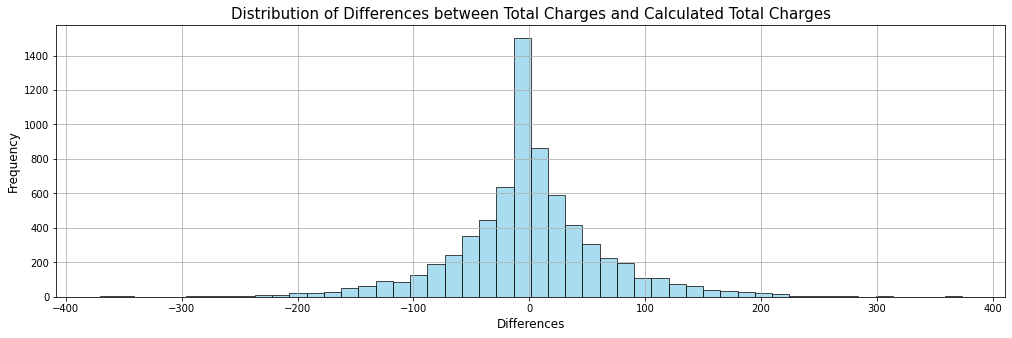

In [8]:
check_diff = client_data[['total_charges', 'monthly_charges', 'total_months', 'contract']].copy()
check_diff['calculated_total_charges'] = (
    check_diff['monthly_charges'] * check_diff['total_months']
)
check_diff['residuals'] = check_diff['total_charges'] - check_diff['calculated_total_charges']

plt.figure(figsize=(17, 5))
plt.hist(check_diff['residuals'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Differences between Total Charges and Calculated Total Charges', fontsize=15)
plt.xlabel('Differences', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

It's possible that there are additional charges or services that contribute to the 'total_charges' and are not captured in the calculated values. This might include one-time fees, add-on services, special promotions, changes in pricing, changes in the contract for that period of time, discount for students and senior citizen etc. Also is it possible that these people have some special status and are exempt from fees? We have no way of knowing that. Now, we can simply examine the discrepancies for each type of contract and what is the actual monetary difference.

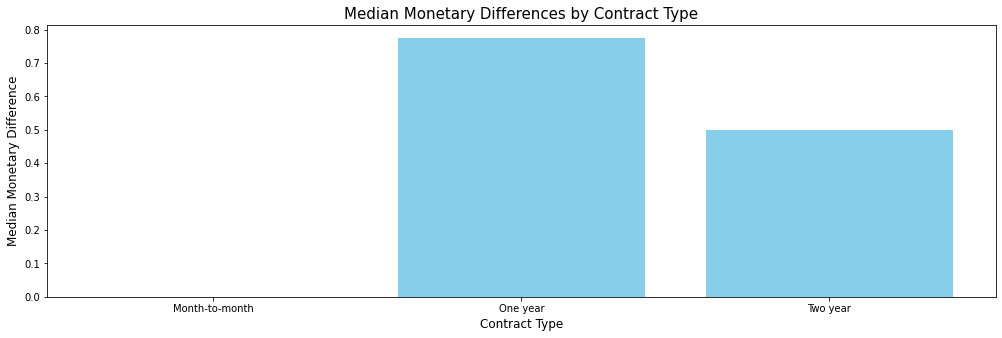

In [9]:
check_diff['monetary_difference'] = check_diff['total_charges'] - (check_diff['monthly_charges'] * check_diff['total_months'])

contract_diff_median = check_diff.groupby('contract')['monetary_difference'].median()

plt.figure(figsize=(17, 5))
plt.bar(contract_diff_median.index, contract_diff_median, color='skyblue')
plt.title('Median Monetary Differences by Contract Type', fontsize=15)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Median Monetary Difference', fontsize=12)
plt.show()

The median difference is about $1 for all contract types. This means that half of our customers have charges that match up when we calculate them by multiplying the monthly charges by the number of months in the service, compared to the total charges in the dataset. We can just fill in the missing total charges by figuring them out from the monthly charges. No need to delete them.

In [10]:
client_data['total_charges'].fillna(client_data['monthly_charges'] * client_data['total_months'], inplace=True)
client_data['total_charges'].isnull().sum()

0

The other attribute with missing values is "churn_reason." It's likely that these null values correspond to users who have already churned. Let's verify if there are any instances of customers who have churned but haven't provided a reason.

In [11]:
churned_without_reason  = client_data[(client_data['churn_label'] == 'Yes') & client_data['churn_reason'].isna()]
churned_without_reason.sum(axis=1)

Series([], dtype: float64)

All customers have given a reason for leaving the company, great news. Let's continue with the next step.

## 3. Understanding and Visualizing the data <a class="anchor" id="Visualizing"></a>

We've got a lot of data to play with. So, let's dig into the numbers and figure out what makes customers leave the service. We will focus on creating distribution for every specific case based on the target label. We want to understand what influences customer churn.

In [12]:
client_data.nunique()

count                   1
country                 1
state                   1
city                 1129
zip_code             1652
lat_long             1652
latitude             1652
longitude            1651
gender                  2
senior_citizen          2
partner                 2
dependents              2
total_months           73
home_phone              2
multiple_phones         3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn_label             2
churn_value             2
churn_score            85
customer_value       3438
churn_reason           20
dtype: int64

In [13]:
client_data.groupby(['country','state', ]).size()

country        state     
United States  California    7043
dtype: int64

The first 3 features have just 1 value for all records. Looks like all of the customers in our data are from the United States of America, California. And all of those 1129 cities are in that area. Let's check if we have a higher % Churn in some of the bigger cities in that state (with more than 40 samples in the data).

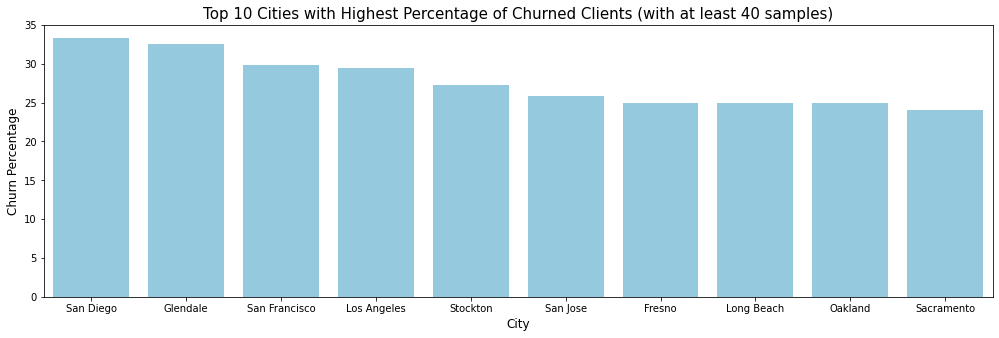

In [14]:
sample_count_by_city = client_data['city'].value_counts()
bigger_cities = sample_count_by_city[sample_count_by_city >= 40].index

churn_by_city = (
    client_data[client_data['city'].isin(bigger_cities)]
    .groupby('city')['churn_value']
    .mean() * 100
)

top_churn_cities = churn_by_city.sort_values(ascending=False).head(10)

plt.figure(figsize=(17, 5))
sns.barplot(x=top_churn_cities.index, y=top_churn_cities.values, color='skyblue')
plt.title('Top 10 Cities with Highest Percentage of Churned Clients (with at least 40 samples)', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Churn Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Looking at the graph, we can see more people leaving the service in big cities like San Diego, Glendale(part of Los Angeles), San Francisco, and Los Angeles compared to the average (which is 26.54%). This might be because there are more companies offering services in these big cities, making the competition tougher. Noticed that cities with a higher percentage of people leaving have fewer than 40 examples. But, with so few examples, it's hard to draw solid conclusions. So, to keep things simple, I suggest excluding all geographical features from the data like "count", "country", "state, "city," "zip-code," "lat_long," "latitude," and "longitude" for our future work.

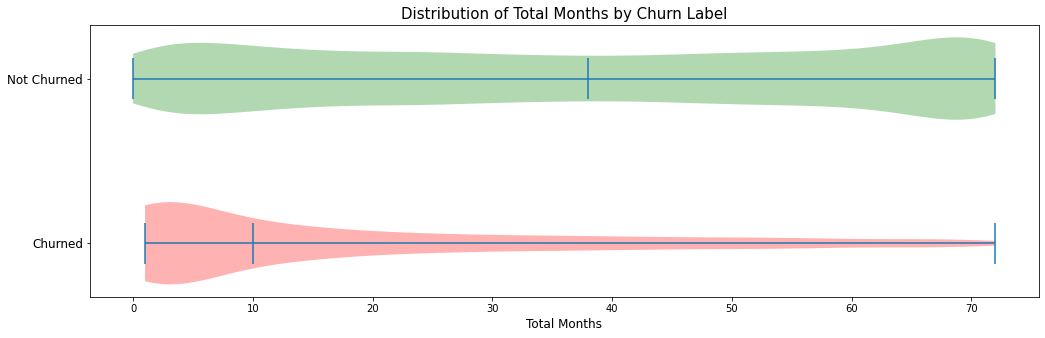

In [15]:
plt.figure(figsize=(17, 5))

violin_parts = plt.violinplot([
    client_data[client_data['churn_label'] == 'Yes']['total_months'],
    client_data[client_data['churn_label'] == 'No']['total_months']
], positions=[1, 2], showmedians=True, vert=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red' if pc.get_paths()[0].vertices[0, 0] > 0 else 'green')

plt.title('Distribution of Total Months by Churn Label', fontsize=15)
plt.xlabel('Total Months', fontsize=12)
plt.yticks([1, 2], ['Churned', 'Not Churned'], fontsize=12)

plt.show()

This is interesting! It looks like the first six months are super important for keeping customers. After this time (from 6 to 12 months), the number of customers leaving sharply increases. On average, customers stick around for about 10 months, indicating that half of them decide to leave during this period. It's a key timeframe that significantly influences whether a customer stays with us.

In [16]:
categorical_variables = ['gender', 'senior_citizen', 'partner', 'dependents', 'home_phone', 'multiple_phones',
                         'internet_service', 'online_security', 'online_backup', 'device_protection',
                         'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
                         'payment_method']

Creating a function that works for both binary and categorical features seems like a good option since almost all of our data is set up that way. Now, let's look again at how these features relate to our target label. We can make the comparison clearer by adding percentages inside the bars. This way, we'll get a better picture of how each group is distributed, making it easier to understand.

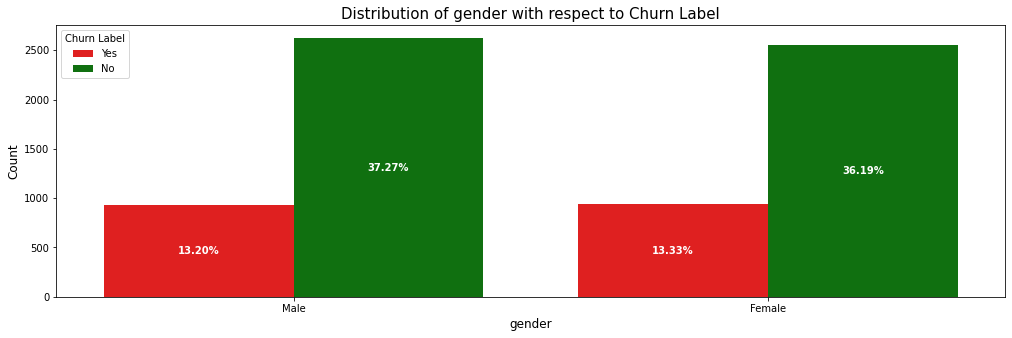

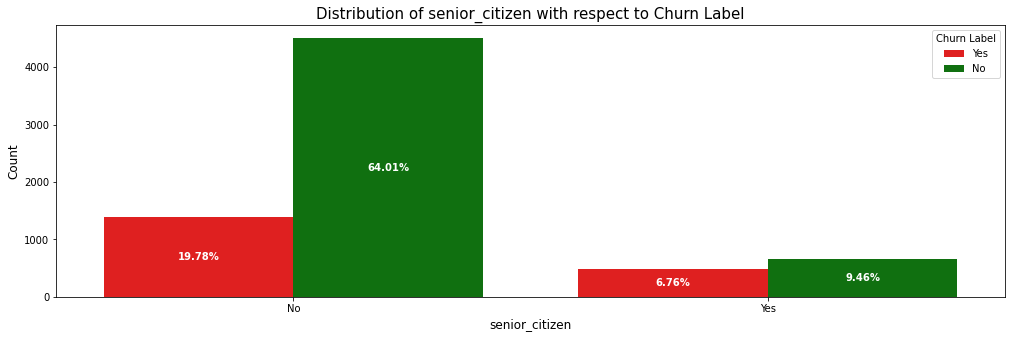

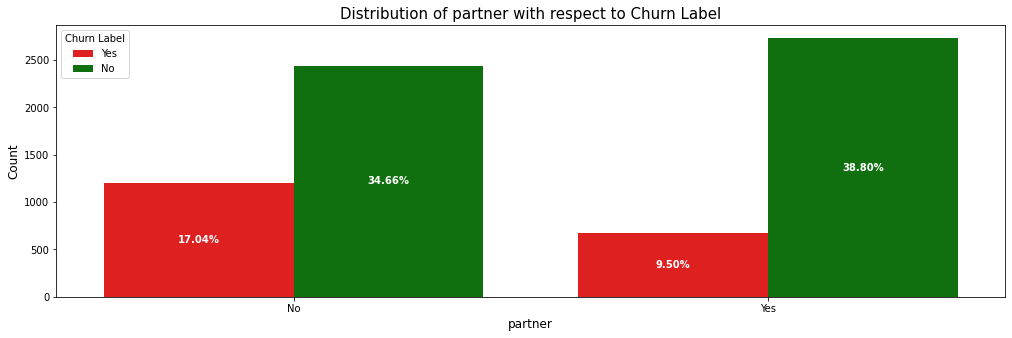

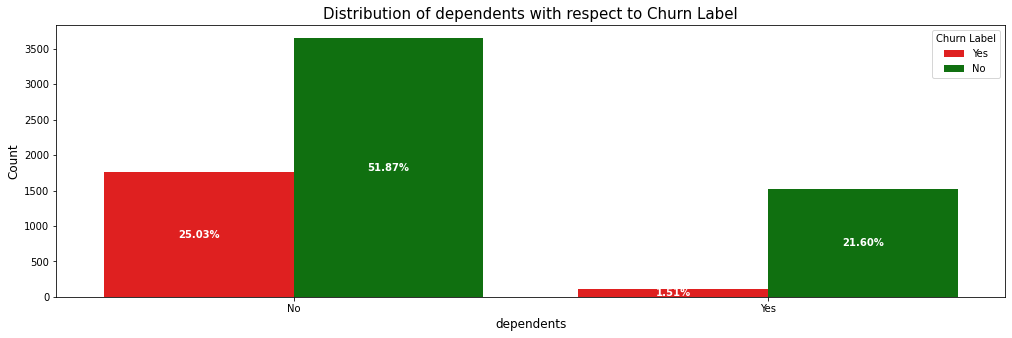

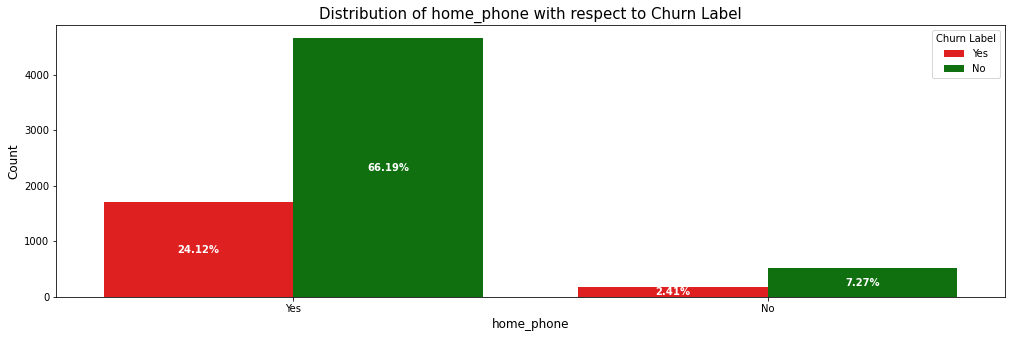

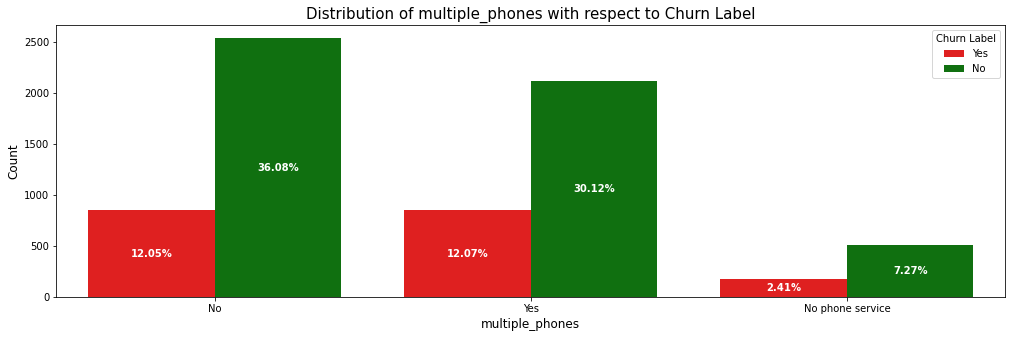

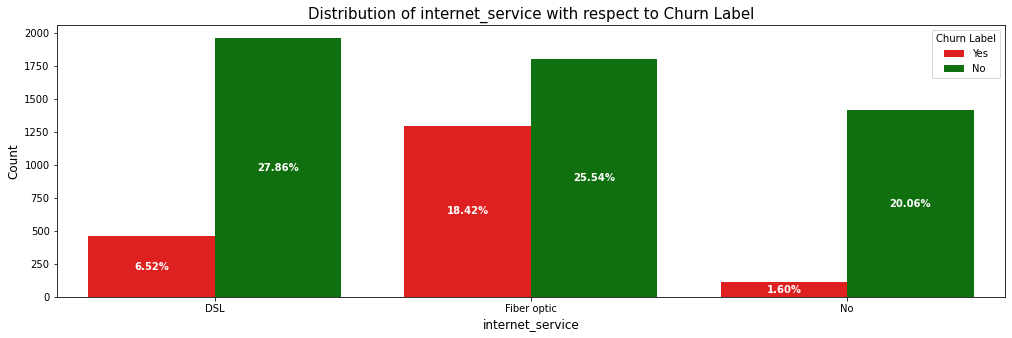

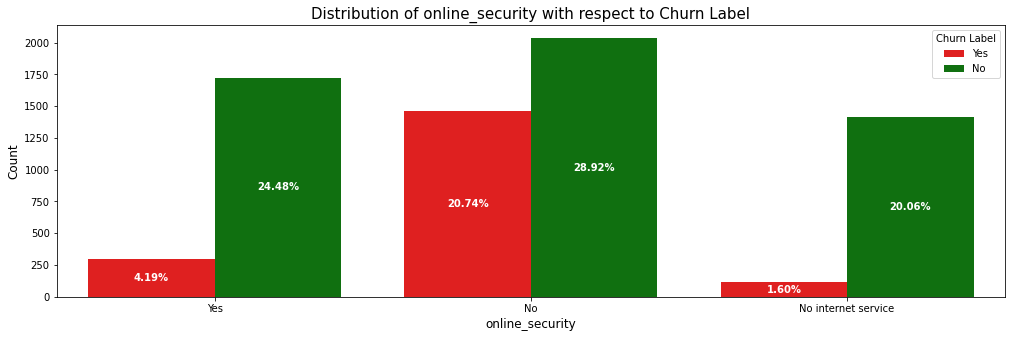

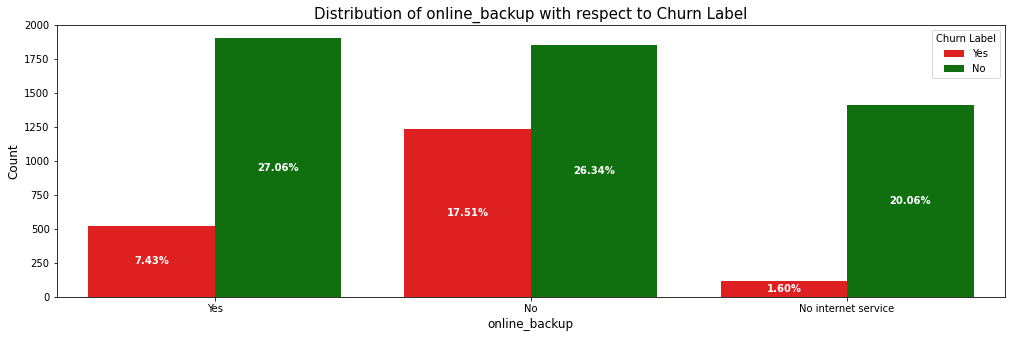

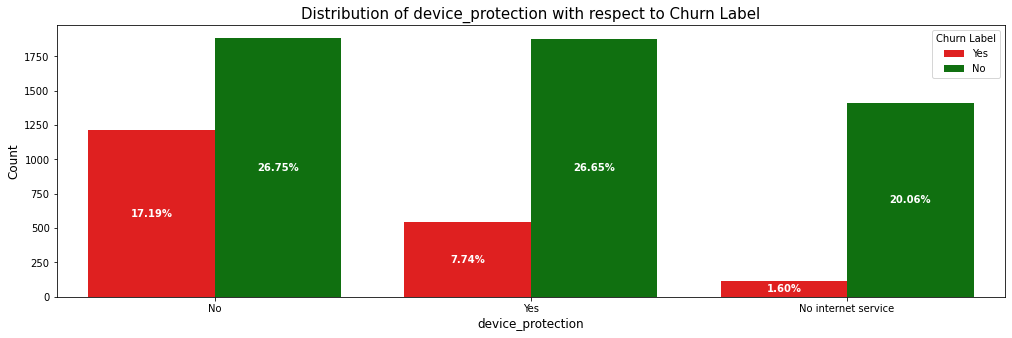

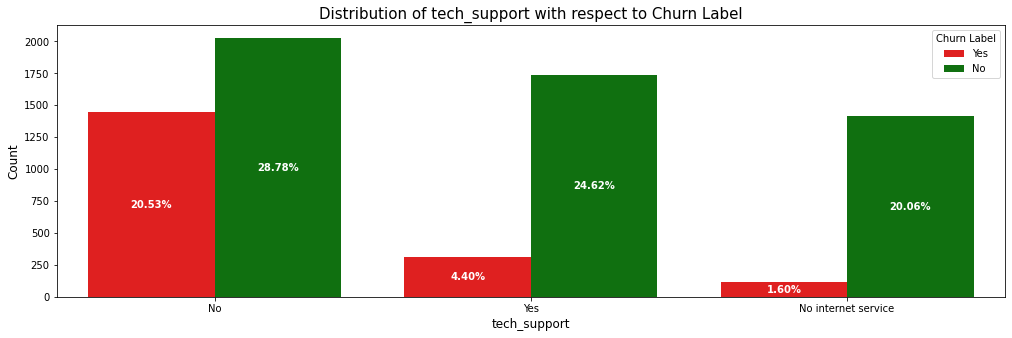

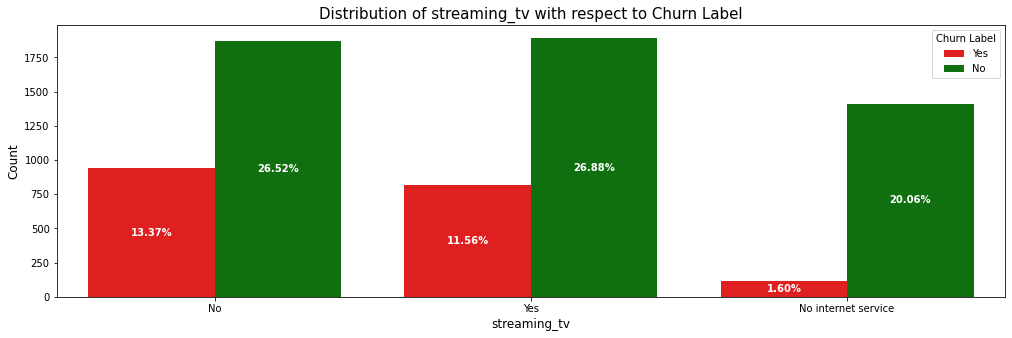

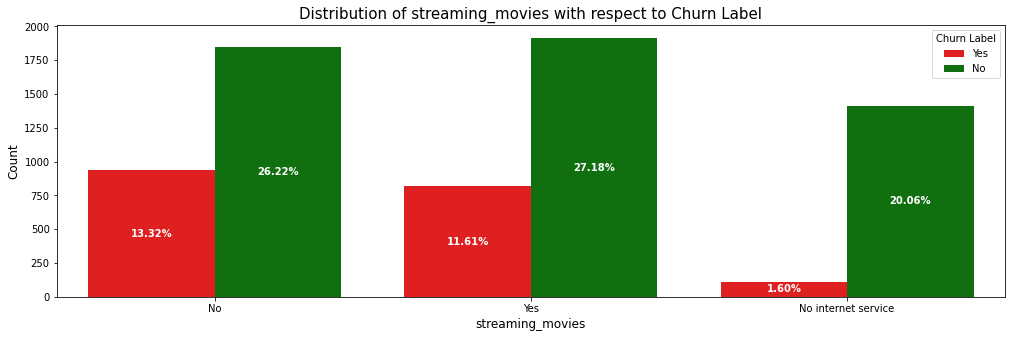

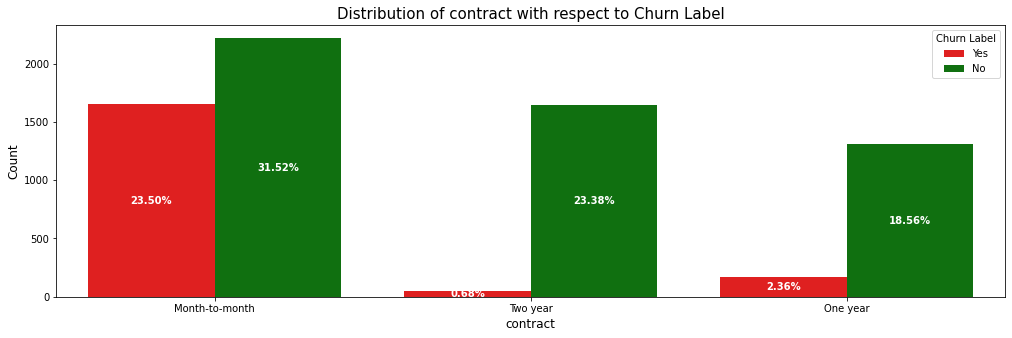

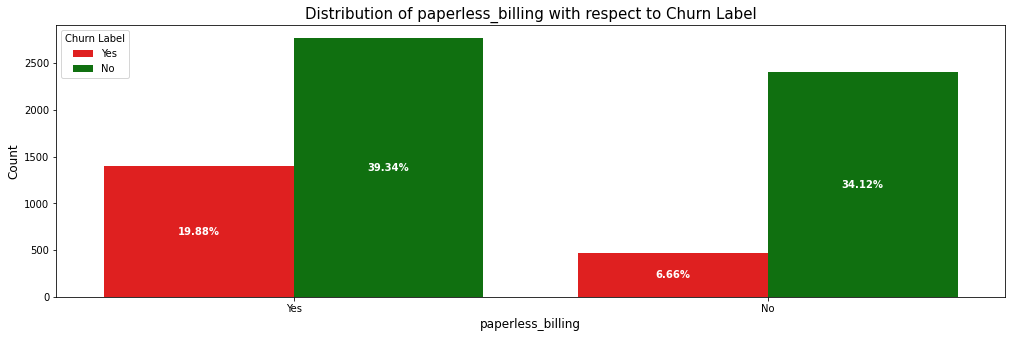

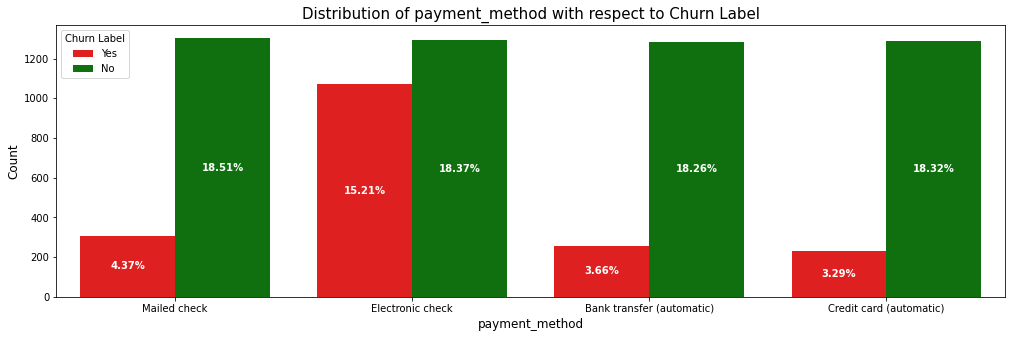

In [17]:
def visualize_categorical_distribution(feature):
    plt.figure(figsize=(17, 5))
    ax = sns.countplot(x=feature, hue='churn_label', data=client_data, palette={'Yes': 'red', 'No': 'green'})

    total = len(client_data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height / 2,
                f'{(height / total) * 100:.2f}%',
                ha="center",
                va="center",
                color="white",
                fontweight="bold")

    plt.title(f'Distribution of {feature} with respect to Churn Label', fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Churn Label')
    plt.show()

for variable in categorical_variables:
    visualize_categorical_distribution(variable)

* The gender is complitly balanced between male and female.

* Senior citizens, customers without a partner, and those without dependents are more likely to churn.

* Services related to internet and streaming - Fiber optic, no online security, no online backup seem to be associated with higher churn rates.

* Month-to-month contract customers and those with paperless billing are more likely to churn.

* Signifivantly difference if the payment methos is Electronic check.

In [18]:
continuous_variables = ['total_months', 'monthly_charges', 'total_charges']

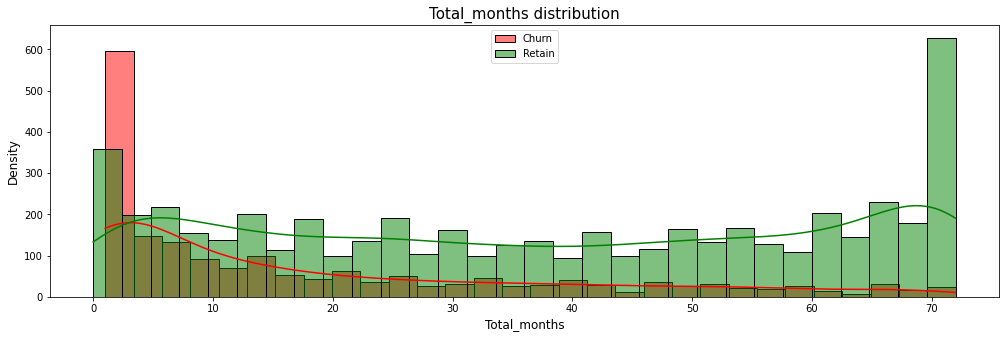

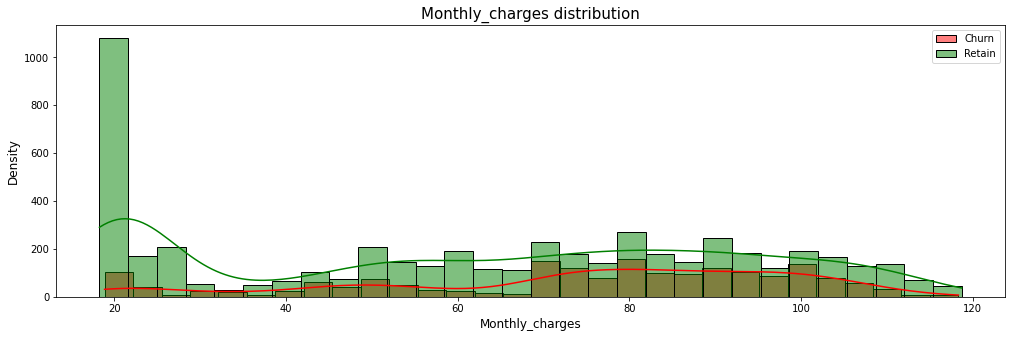

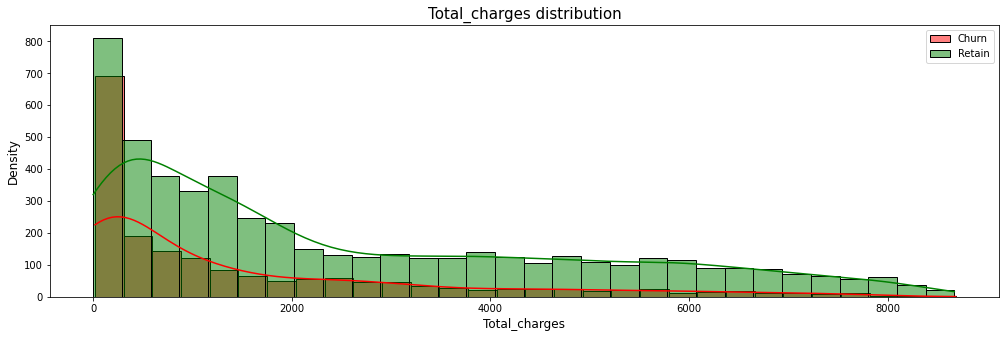

In [19]:
def visualize_continuous_distribution(feature):
    plt.figure(figsize=(17, 5))
    plt.title(f'{feature.capitalize()} distribution', fontsize=15)

    sns.histplot(client_data[client_data['churn_label'] == 'Yes'][feature], label='Churn', color='red', kde=True, bins=30)
    sns.histplot(client_data[client_data['churn_label'] == 'No'][feature], label='Retain', color='green', kde=True, bins=30)

    plt.legend()

    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

for variable in continuous_variables:
    visualize_continuous_distribution(variable)

* Total Months are identified as a crucial factor in predicting churn. Longer total months correlates with lower Churn rates. Encourage customer loyalty and engagement.

* Clients with higher Monthly Charges are more prone to Churn. Evaluate pricing strategies or offer promotions to address this.

* Recent clients show a higher likelihood of churning. Consider strategies to improve retention for this group.

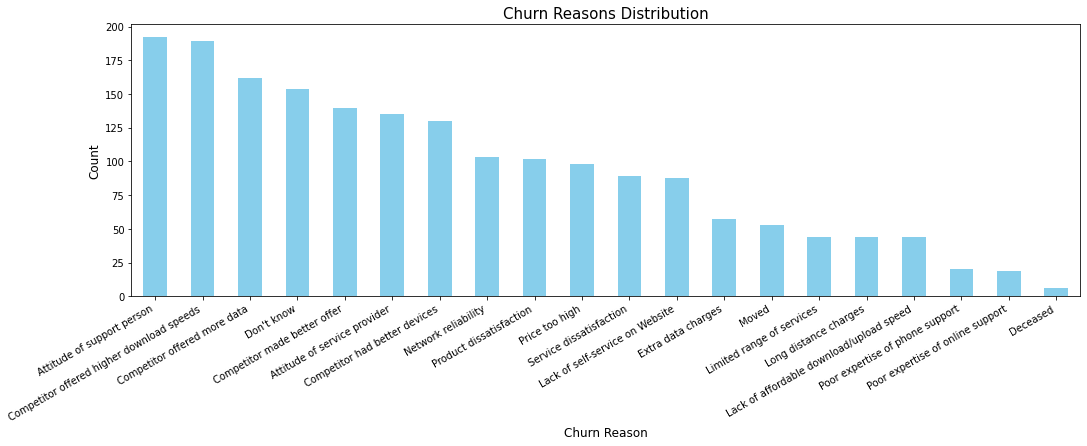

In [20]:
churn_reason_counts = client_data['churn_reason'].value_counts()

plt.figure(figsize=(17, 5))
churn_reason_counts.plot(kind='bar', color='skyblue')
plt.title('Churn Reasons Distribution', fontsize=15)
plt.xlabel('Churn Reason', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()

Customer survey data gives us useful information about people's opinions, but it has some limitations. Opinions are subjective and can be influenced by personal biases. While these opinions are important for understanding customer perspectives and improving our business, we recognize that they may not always give a complete and quantifiable metric.

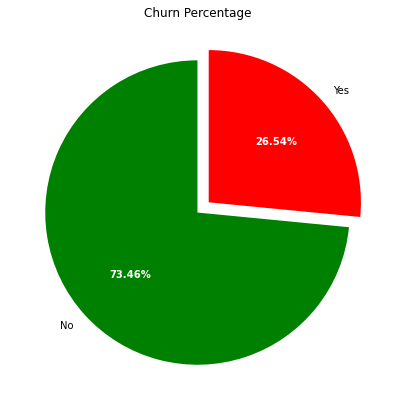

In [21]:
plt.figure(figsize=(7, 7)) 

churn_percentage = client_data['churn_label'].value_counts(normalize=True) * 100

explode = (0, 0.1)

patches, texts, autotexts = plt.pie(churn_percentage, labels=churn_percentage.index, autopct='', colors=['green', 'red'], startangle=90, explode=explode)

for autotext, percentage in zip(autotexts, churn_percentage):
    autotext.set_color('white')  
    autotext.set_weight('bold')  
    autotext.set_text(f'{percentage:.2f}%')  


plt.title('Churn Percentage', fontsize=12)

plt.show()

We are dealing with imbalanced classes, where one class is significantly more prevalent than the other, standard accuracy might not be the best metric to evaluate models. This is because a model could achieve high accuracy by simply predicting the majority class all the time. Instead, we might want to consider other evaluation metrics that provide a more nuanced understanding of the model's performance.

## 4. Outliers Detection <a class="anchor" id="Outliers"></a>

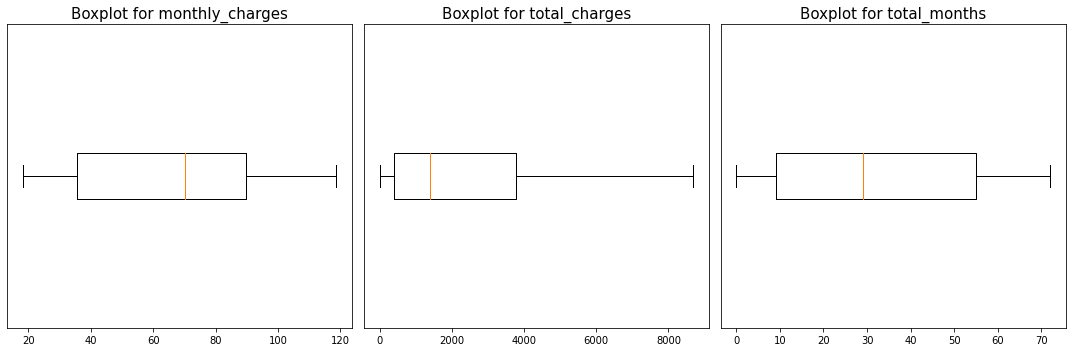

In [22]:
def plot_boxplot(data, feature_name):
    plt.boxplot(data[feature_name], vert=False)
    plt.title(f'Boxplot for {feature_name}', fontsize=15)
    plt.yticks([]) 
    
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
plot_boxplot(client_data, 'total_months')

plt.subplot(1, 3, 1)
plot_boxplot(client_data, 'monthly_charges')

plt.subplot(1, 3, 2)
plot_boxplot(client_data, 'total_charges')

plt.tight_layout()
plt.show()

Amazing! We don't have outliers. What does it mean? We can use StandertScler without handling outliers. I think in our case StandertScler is a better idea than MinMaxSclaer because it works better with algorithms such as Logistic regression, Support Vector Machines, and k-Nearest Neighbors.

## 5. Preprocessing <a class="anchor" id="Preprocessing"></a>

In [23]:
column_list = client_data.columns.tolist()
print(column_list)

['count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude', 'gender', 'senior_citizen', 'partner', 'dependents', 'total_months', 'home_phone', 'multiple_phones', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'churn_label', 'churn_value', 'churn_score', 'customer_value', 'churn_reason']


In [24]:
columns_to_drop = ['count', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude',
                   'churn_label', 'churn_value', 'churn_score', 'customer_value', 'churn_reason']


client_attributes = client_data.drop(columns=columns_to_drop, axis=1)
client_label = client_data.churn_value

print(client_attributes.shape, client_label.shape)

(7043, 19) (7043,)


One-Hot Encoding:

In [25]:
client_attributes = pd.get_dummies(client_attributes)
client_attributes.tail(3)

,total_months,monthly_charges,total_charges,gender_Female,gender_Male,senior_citizen_No,senior_citizen_Yes,partner_No,partner_Yes,dependents_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
2234-XADUH,72,103.20,7362.90,1,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
4801-JZAZL,11,29.60,346.45,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3186-AJIEK,66,105.65,6844.50,0,1,1,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0


In [26]:
# Need a copy for my latest research
fe_client_attributes = client_attributes.copy()

Standard scaling is applied to standardize the cntinuous variables, ensuring that they have a mean of 0 and a standard deviation of 1. This is important for algorithms that are sensitive to the scale of features, like I mentioned earlier.

In [27]:
scaler = StandardScaler()
client_attributes[continuous_variables] = scaler.fit_transform(client_attributes[continuous_variables])

Stratified splitting ensures that the class distribution is maintained in both the training and testing sets.
stratify=client_label is used in train_test_split to stratify the split based on the target variable.

In [28]:
client_attributes_train, client_attributes_test, client_label_train, client_label_test = train_test_split(
    client_attributes, client_label, train_size=0.8, test_size=0.2, random_state=42, stratify=client_label
)

client_attributes_train.shape, client_label_train.shape, client_attributes_test.shape, client_label_test.shape

((5634, 46), (5634,), (1409, 46), (1409,))

Imbalanced datasets can lead to models that are better at predicting the majority class but perform poorly on the minority class. Oversampling or undersampling is only the solution but due small size of dataset we will look for oversampling only. We will use SMOTE (Synthetic Minority Over-sampling Technique) is a technique to balance the class distribution by creating synthetic examples of the minority class.

In [29]:
smote = SMOTE(random_state=42,)

client_attributes_resampled, client_label_resampled = smote.fit_resample(client_attributes_train, client_label_train)
client_attributes_resampled.shape, client_label_resampled.shape

((8278, 46), (8278,))

## 6. Model Selection <a class="anchor" id="Model"></a>

What do we know about our data? It is not severely unbalanced, but at the same time, It's enough unbalanced to be a problem. The target label has almost 3/4 class NO or 0 (73.46%) and 1/4 class Yes or 1 (26.54%). At the same time, we have to deal with a small dataset with fewer samples (7042). Based on this information, I think the best option to evaluate the model is recall. Maximizing recall means minimizing false negatives, which is important when we want to capture as many positive instances as possible, even if it results in some false positives. We can plot also ROC AUC curve to follow the FP and TP rate. In our hyperparameter tuning with GridSearchCV, we will use **Recall**  as the base scoring metric but at the same time, we will take a look at different metrics. 

**GridSearchCV** is a method for hyperparameter tuning that systematically tests a predefined set of hyperparameter values for a model. It performs an exhaustive search over a specified parameter grid, fitting the model and evaluating its performance for each combination of hyperparameters.GridSearchCV uses cross-validation to assess the performance of each combination, helping to find the hyperparameters that yield the best model performance.

In [30]:
def train_and_evaluate_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid, 
        scoring='recall',
        cv=5 
    )

    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)

    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)

    predictions = best_model.predict(client_attributes_test)

    classification_report_result = classification_report(client_label_test, predictions)
    print("Classification Report (Test Set):\n", classification_report_result)

    train_predictions = best_model.predict(X_train)
    train_classification_report_result = classification_report(y_train, train_predictions)
    print("Classification Report (Training Set):\n", train_classification_report_result)

    plt.figure(figsize=(20, 5))

    plt.subplot(1, 3, 1)
    sns.heatmap(confusion_matrix(client_label_test, predictions), annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title('Confusion Matrix', fontsize=15)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(client_label_test, best_model.predict_proba(client_attributes_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
    plt.title('ROC Curve', fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend()

    cv_recall_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='recall')
    print("Cross-Validation Recall Scores:", cv_recall_scores)
    print("Cross-Validation Mean Recall Score:", np.mean(cv_recall_scores))

    plt.show()

    return best_model, classification_report_result

The function **train_and_evaluate_model** performs the following tasks: 
* Grid Search and Hyperparameter Tuning: find the best hyperparameters for a model based on a provided parameter grid.
* Model Training: Trains the best hyperparameters ahain on the provided training data.
* Prediction and Evaluation: Predicts outcomes on a separate test dataset and prints classification report for the test set.
* Recall Calculation: Calculates recall on both the training and test sets.
* Plotting: Confusion Matrix heatmap and ROC Curve for the test set.
* CV Scores: Computes recall scores using cross-validation on the training set.

In [31]:
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

def update_model_table(model, predictions, classification_report_result, results_df=None):
    if results_df is None:
        results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    accuracy = round(accuracy_score(client_label_test, predictions), 2)
    precision = round(precision_score(client_label_test, predictions), 2)
    recall = round(recall_score(client_label_test, predictions), 2)
    f1 = round(f1_score(client_label_test, predictions), 2)

    new_row = pd.DataFrame({
        'Model': [model],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

    results_df = pd.concat([results_df, new_row], ignore_index=True)

    return results_df

The function **update_model_table** is updating a results DataFrame with evaluation metrics for a given model. 

### 6.1. Logistic Regression <a class="anchor" id="Logistic"></a>

Logistic regression can be adapted for imbalanced datasets by adjusting class weights. By giving more importance to the minority class during training, logistic regression can better capture patterns in the minority class. 
* *C*: Controls the trade-off between fitting the training data well and preventing overfitting. Smaller values increase regularization.
* *fit_intercept*: Determines whether an intercept term is included in the model.
* *solver*: Specifies the optimization algorithm used by the logistic regression model.
* *max_iter*: Limits the number of iterations for the solver to converge.

In [32]:
lr_params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "fit_intercept": [True, False],
    "solver": ['lbfgs', 'liblinear'],
    "max_iter": [10, 100, 200, 250]
}

_No OverSampling_

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Best Hyperparameters: {'C': 10, 'fit_intercept': True, 'max_iter': 10, 'solver': 'liblinear'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      4139
           1       0.67      0.59      0.63      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.74      0.75      5634
weighted avg       0.81      0.81      0.81      5634

Cross-Validation Recall Scores: [0.6187291  0.56187291 0.57190635 0.58862876 0.57525084]
Cross-Validation Mean Recall Score: 0.5832775919732441


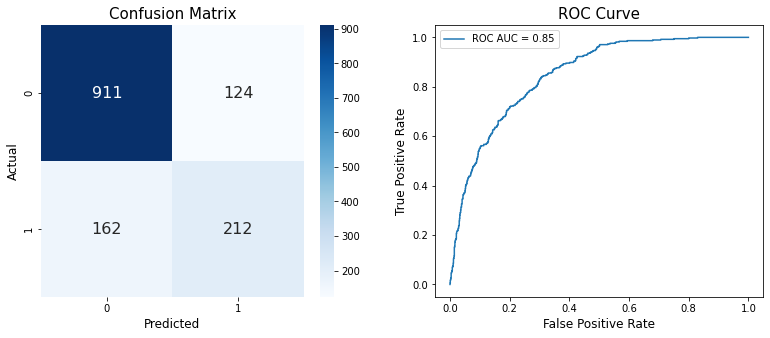

In [33]:
lr_model, lr_classification_report = train_and_evaluate_model(
    LogisticRegression(), lr_params, client_attributes_train, client_label_train
)

In [34]:
results_df = update_model_table('Logistic Regression', lr_model.predict(client_attributes_test),
                                lr_classification_report, results_df)

_With OverSampling_

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Li

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Li

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Li

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Best Hyperparameters: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'solver': 'lbfgs'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1035
           1       0.57      0.71      0.63       374

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      4139
           1       0.83      0.87      0.85      4139

    accuracy                           0.85      8278
   macro avg       0.85      0.85      0.85      8278
weighted avg       0.85      0.85      0.85      8278



C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Cross-Validation Recall Scores: [0.67512077 0.74637681 0.96497585 0.94921403 0.95048309]
Cross-Validation Mean Recall Score: 0.8572341096682614


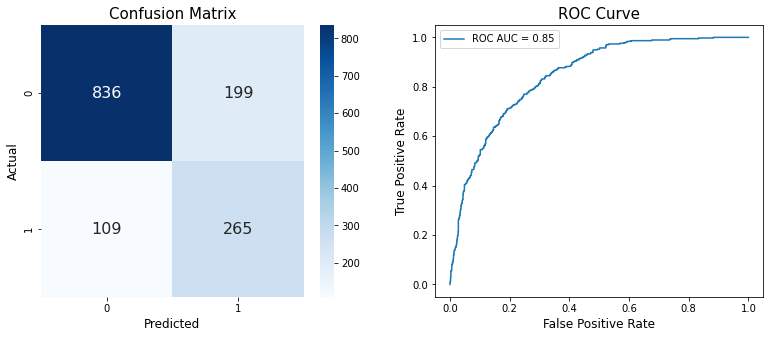

In [35]:
lr_model, lr_classification_report = train_and_evaluate_model(
    LogisticRegression(), lr_params, client_attributes_resampled, client_label_resampled
)

In [36]:
results_df = update_model_table('Logistic Regression SMOTE', lr_model.predict(client_attributes_test),
                                lr_classification_report, results_df)

The recall values for both the training and test sets are relatively high and close to each other. The fact that the recall values are comparable suggests that the model generalizes well to unseen data. We want the model to perform similarly on both the training and test sets:
* The training recall indicates how well the model is capturing patterns in the training data.
* The test recall indicates how well the model generalizes to new, unseen data.

### 6.2. K-Nearest Neighbors  <a class="anchor" id="Neighbors"></a>

KNN is conceptually straightforward and easy to implement. Its simplicity makes it a good choice for quick prototyping and initial exploration of the data.
* *n_neighbors*: Represents the number of nearest neighbors. A smaller number may lead to a more flexible model, but it can be sensitive to noise. A larger number may provide more stable predictions but might smooth out important patterns.
* *weights*: Determines how the neighbors' contributions are weighted. 'uniform' gives equal weight to all neighbors, while 'distance' gives more weight to closer neighbors. 'distance' is often useful with unbalanced data, as it tends to downweight the influence of distant points.
* *p*: The power parameter for the Minkowski distance. Choosing between Manhattan distance (p=1) and Euclidean distance (p=2) allows you to control the sensitivity to different types of distances. 
* *algorithm*: This parameter specifies the algorithm used to compute the nearest neighbors. 'auto' automatically selects the most suitable algorithm based on the training data. 'ball_tree' is tree-based algorithms, which can be efficient for certain datasets. 'brute' computes the distances between all pairs of training points, which might be suitable for smaller datasets.

In [37]:
knn_params = {
    "n_neighbors": [3,5,7,10],
    "weights": ['uniform', 'distance'],
    "p": [1,2], 
    "algorithm":  ['auto', 'ball_tree', 'brute']
}

_No OverSampling_

Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.57      0.59      0.58       374

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.77      0.77      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      4139
           1       0.71      0.67      0.69      1495

    accuracy                           0.84      5634
   macro avg       0.80      0.78      0.79      5634
weighted avg       0.84      0.84      0.84      5634

Cross-Validation Recall Scores: [0.60200669 0.56187291 0.56856187 0.58862876 0.57190635]
Cross-Validation Mean Recall Score: 0.5785953177257526


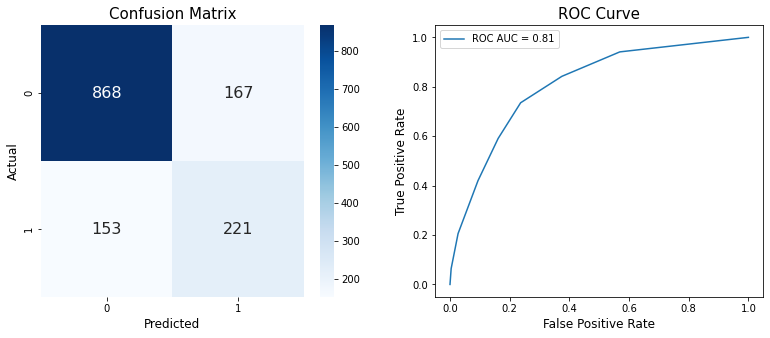

In [38]:
knn_model, knn_classification_report = train_and_evaluate_model(
    KNeighborsClassifier(), knn_params, client_attributes_train, client_label_train
)

In [39]:
results_df = update_model_table('K-Nearest Neighbors', knn_model.predict(client_attributes_test),
                                knn_classification_report, results_df)

_With OverSampling_

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      1035
           1       0.50      0.68      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.75      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      4139
           1       0.85      0.97      0.91      4139

    accuracy                           0.90      8278
   macro avg       0.91      0.90      0.90      8278
weighted avg       0.91      0.90      0.90      8278

Cross-Validation Recall Scores: [0.88164251 0.87318841 0.98188406 0.94921403 0.97222222]
Cross-Validation Mean Recall Score: 0.9316302449339618


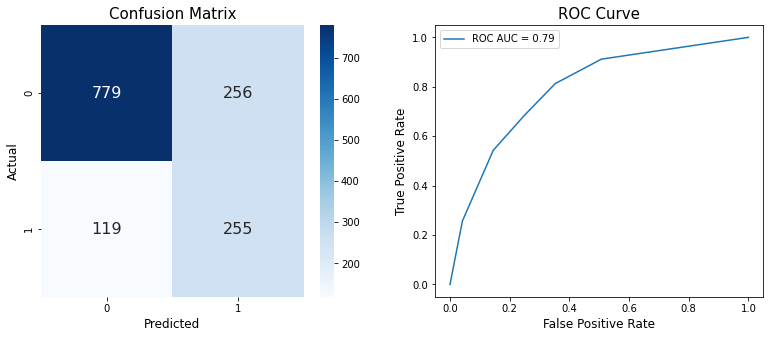

In [40]:
knn_model, knn_classification_report = train_and_evaluate_model(
    KNeighborsClassifier(), knn_params, client_attributes_resampled, client_label_resampled
)

In [41]:
results_df = update_model_table('K-Nearest Neighbors SMOTE', knn_model.predict(client_attributes_test),
                                knn_classification_report, results_df)

A training score shows that the model is performing well on the training data and is sensitive to identifying positive instances. The test score is lower than the training score, suggesting that the model not generalize to new, unseen data. The significant difference between training and test recall values indicates __overfitting__.
Overfitting occurs when a model learns the training data too well, including its noise and outliers, and struggles to generalize to new data.

The cross-validation results suggest that the model's recall performance varies across different folds, and the mean recall score is lower than the training recall. The variability in recall scores across folds indicates that the model's performance is sensitive to the particular subset of data used for training in each fold.

### 6.3. Support Vector Machines: <a class="anchor" id="SVM"></a>


SVMs can be effective in handling imbalanced datasets, offering a versatile approach to classification tasks, and their ability to control the trade-off between achieving a smooth decision boundary and classifying training points correctly makes them particularly adaptable.
* *C*: Controls the trade-off between achieving a smooth decision boundary and classifying training points correctly.

* *kernel*: Determines the type of decision boundary used by the SVM. Linear kernels may be suitable for less complex boundaries, while radial basis functions may capture more complex patterns.

In [42]:
svc_params = {
    "C": [0.001,0.01, 0.1, 1],
    "kernel": ['linear', 'poly', "rbf"],
}

_No OverSampling_

Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4139
           1       0.67      0.56      0.61      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634

Cross-Validation Recall Scores: [0.60535117 0.54180602 0.53511706 0.57190635 0.56856187]
Cross-Validation Mean Recall Score: 0.5645484949832775


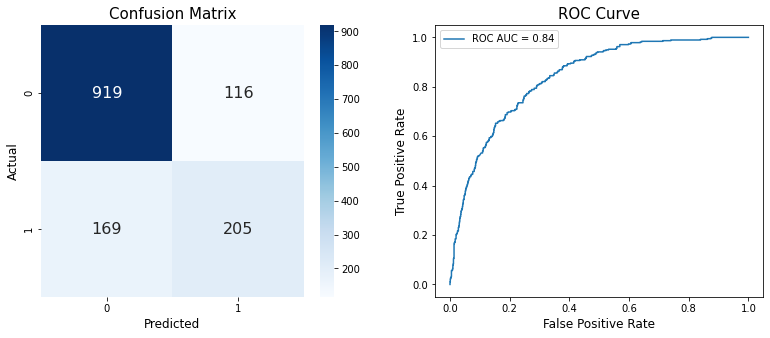

In [43]:
svc_model, svc_classification_report = train_and_evaluate_model(
    SVC(probability=True), svc_params, client_attributes_train, client_label_train
)

In [44]:
results_df = update_model_table('Support Vector Machines', svc_model.predict(client_attributes_test),
                                svc_classification_report, results_df)

_With OverSampling_

Best Hyperparameters: {'C': 0.01, 'kernel': 'linear'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      4139
           1       0.80      0.87      0.83      4139

    accuracy                           0.83      8278
   macro avg       0.83      0.83      0.83      8278
weighted avg       0.83      0.83      0.83      8278

Cross-Validation Recall Scores: [0.74516908 0.7826087  0.91183575 0.89721886 0.91062802]
Cross-Validation Mean Recall Score: 0.8494920818510536


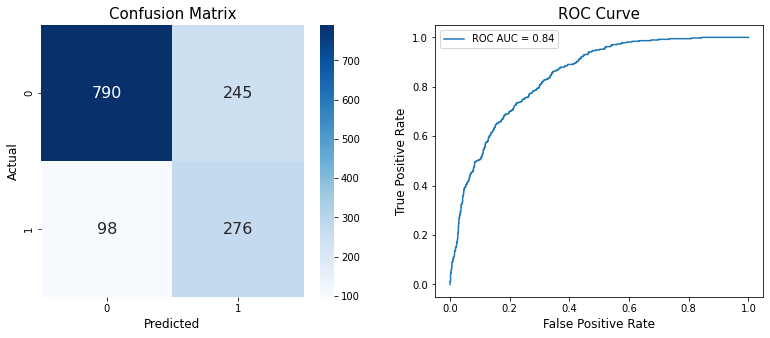

In [45]:
svc_model, svc_classification_report = train_and_evaluate_model(
    SVC(probability=True), svc_params, client_attributes_resampled, client_label_resampled
)

In [46]:
results_df = update_model_table('Support Vector Machines SMOTE', svc_model.predict(client_attributes_test),
                                svc_classification_report, results_df)

### 6.4. Random Forest <a class="anchor" id="Forest"></a>

Random Forests can handle imbalanced datasets well and are less prone to overfitting.They build multiple decision trees, and by combining their predictions, they can provide robust performance.
* *n_estimators*: Increasing the number of trees can improve model performance up to a certain point, reducing overfitting.

* *criterion*: It defines the function to measure the quality of a split. The choice between "gini" and "entropy" affects how the algorithm decides to split nodes. 

* *max_depth*: Controlling the depth helps prevent overfitting. A shallow tree might be too simplistic, while a deep tree could capture noise in the data.

In [47]:
rf_params = {
    "n_estimators": [50, 100, 200, 300,400],
    "criterion": ["gini", "entropy"],
    "max_depth": [10, 20, 30]
}

_No OverSampling_

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      4139
           1       0.79      0.70      0.74      1495

    accuracy                           0.87      5634
   macro avg       0.84      0.82      0.83      5634
weighted avg       0.87      0.87      0.87      5634

Cross-Validation Recall Scores: [0.59197324 0.52508361 0.5451505  0.53846154 0.53846154]
Cross-Validation Mean Recall Score: 0.5478260869565217


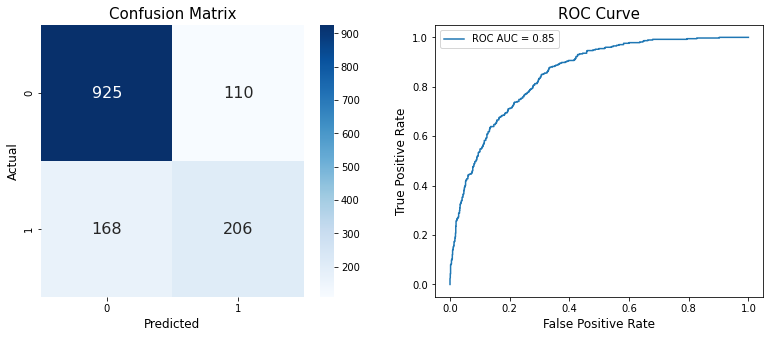

In [48]:
rf_model, rf_classification_report = train_and_evaluate_model(
    RandomForestClassifier(), rf_params, client_attributes_train, client_label_train
)

In [49]:
results_df = update_model_table('Random Forest', rf_model.predict(client_attributes_test),
                                rf_classification_report, results_df)

_With OverSampling_

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.74      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      4139
           1       0.84      0.95      0.89      4139

    accuracy                           0.89      8278
   macro avg       0.89      0.89      0.89      8278
weighted avg       0.89      0.89      0.89      8278

Cross-Validation Recall Scores: [0.79468599 0.82004831 0.96256039 0.93833132 0.94202899]
Cross-Validation Mean Recall Score: 0.8915309979029026


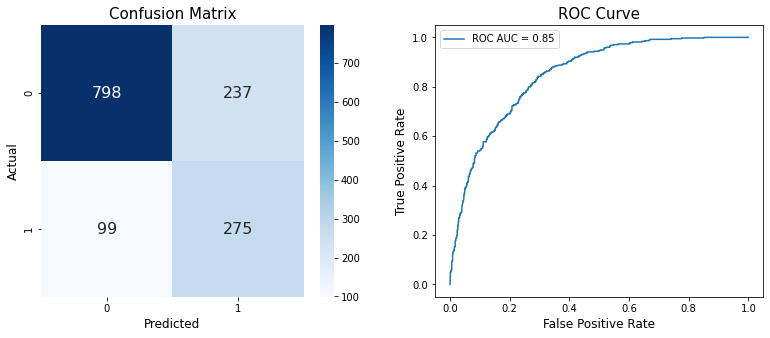

In [50]:
rf_model, rf_classification_report = train_and_evaluate_model(
    RandomForestClassifier(), rf_params, client_attributes_resampled, client_label_resampled
)

In [51]:
results_df = update_model_table('Random Forest SMOTE', rf_model.predict(client_attributes_test),
                                rf_classification_report, results_df)

### 6.5. XGBoost Classifier <a class="anchor" id="XGBoost"></a>

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm that uses a collection of weak learners (typically decision trees) to create a strong predictive model. 

* *learning_rate*: Controls the step size at each iteration while moving toward a minimum of the loss function. 
* *n_estimators*: Represents the number of weak learners (trees) to be built. 
* *max_depth*:  Defines the maximum depth of each tree. A deeper tree can capture more complex patterns but might lead to overfitting. 
* *subsample*: Determines the fraction of training data to be used for building each tree. Lower values prevent overfitting by introducing randomness, while higher values might lead to overfitting. 

In [52]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200],
    "max_depth": [3, 7],
    "subsample": [0.8, 1.0],
}

_No OverSampling_

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.86      0.91      0.89      4139
           1       0.71      0.60      0.65      1495

    accuracy                           0.83      5634
   macro avg       0.79      0.76      0.77      5634
weighted avg       0.82      0.83      0.82      5634

Cross-Validation Recall Scores: [0.6187291  0.54180602 0.56856187 0.57859532 0.54180602]
Cross-Validation Mean Recall Score: 0.5698996655518395


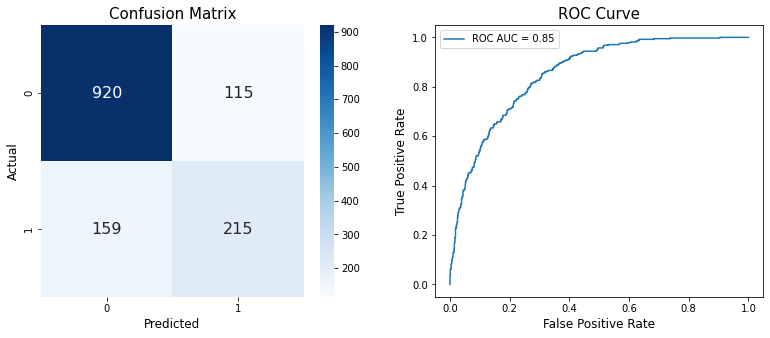

In [53]:
xgb_model, xgb_classification_report = train_and_evaluate_model(
    XGBClassifier(), xgb_params, client_attributes_train, client_label_train
)

In [54]:
results_df = update_model_table('XGBoost Classifier', xgb_model.predict(client_attributes_test),
                                xgb_classification_report, results_df)

_With OverSampling_

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      1035
           1       0.55      0.75      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      4139
           1       0.83      0.92      0.87      4139

    accuracy                           0.87      8278
   macro avg       0.87      0.87      0.87      8278
weighted avg       0.87      0.87      0.87      8278

Cross-Validation Recall Scores: [0.75241546 0.82608696 0.96014493 0.94800484 0.9468599 ]
Cross-Validation Mean Recall Score: 0.8867024166272366


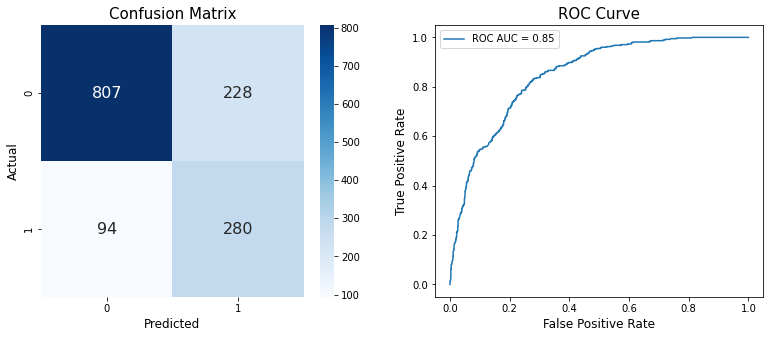

In [55]:
xgb_model, xgb_classification_report = train_and_evaluate_model(
    XGBClassifier(), xgb_params, client_attributes_resampled, client_label_resampled
)

In [56]:
results_df = update_model_table('XGBoost Classifier SMOTE', xgb_model.predict(client_attributes_test),
                                xgb_classification_report, results_df)

In [57]:
print(results_df)

                           Model  Accuracy  Precision  Recall  F1 Score
0            Logistic Regression      0.80       0.63    0.57      0.60
1      Logistic Regression SMOTE      0.78       0.57    0.71      0.63
2            K-Nearest Neighbors      0.77       0.57    0.59      0.58
3      K-Nearest Neighbors SMOTE      0.73       0.50    0.68      0.58
4        Support Vector Machines      0.80       0.64    0.55      0.59
5  Support Vector Machines SMOTE      0.76       0.53    0.74      0.62
6                  Random Forest      0.80       0.65    0.55      0.60
7            Random Forest SMOTE      0.76       0.54    0.74      0.62
8             XGBoost Classifier      0.81       0.65    0.57      0.61
9       XGBoost Classifier SMOTE      0.77       0.55    0.75      0.63


In all the methods that use SMOTE, we've noticed a problem, which is overfitting. Overfitting is around 10% in all different model evaluations. So, I'm going to focus on checking how well algorithms perform without using this oversampling technique. From the results we've seen before, it seems there's a good chance to make some models better. For the last part, we'll improve Logistic Regression, SVC, and Random Forest.

## 7. Feature Engineering <a class="anchor" id="Engineering"></a>

The Goal of feature engineering is to enhance decision-making using the data at hand by either eliminating or introducing new features. This process can lead to improved performance in our models. I'll be experimenting with various approaches to see what works and what doesn't. Every new feature is going to be scored and tested.

In [58]:
print(fe_client_attributes.columns.tolist())

['total_months', 'monthly_charges', 'total_charges', 'gender_Female', 'gender_Male', 'senior_citizen_No', 'senior_citizen_Yes', 'partner_No', 'partner_Yes', 'dependents_No', 'dependents_Yes', 'home_phone_No', 'home_phone_Yes', 'multiple_phones_No', 'multiple_phones_No phone service', 'multiple_phones_Yes', 'internet_service_DSL', 'internet_service_Fiber optic', 'internet_service_No', 'online_security_No', 'online_security_No internet service', 'online_security_Yes', 'online_backup_No', 'online_backup_No internet service', 'online_backup_Yes', 'device_protection_No', 'device_protection_No internet service', 'device_protection_Yes', 'tech_support_No', 'tech_support_No internet service', 'tech_support_Yes', 'streaming_tv_No', 'streaming_tv_No internet service', 'streaming_tv_Yes', 'streaming_movies_No', 'streaming_movies_No internet service', 'streaming_movies_Yes', 'contract_Month-to-month', 'contract_One year', 'contract_Two year', 'paperless_billing_No', 'paperless_billing_Yes', 'payme

### 7.1. Remove attributes <a class="anchor" id="Remove"></a> 

Looking at the feature importance plot, it's clear that features related to 'No internet service' and 'multiple_phones_No phone service' don't play a big role. The info carried by the "internet_service" feature is pretty much the same as these. Also, there's redundancy between "home_phone" and 'multiple_phones_No phone service,' showing that the latter is linked to having no service for multiple lines. So, it makes sense to drop this variable from our analysis.

In [59]:
no_internet_service = [col for col in fe_client_attributes.columns if 'No internet service' in col]
fe_client_attributes.drop(columns=no_internet_service, axis=1, inplace=True)
fe_client_attributes.drop(['multiple_phones_No phone service'], axis=1, inplace=True)

Given the available information, both gender classes appear to be evenly balanced. In light of this, it seems that our predictions are unlikely to be significantly influenced by this particular dataset.

In [60]:
fe_client_attributes.drop(['gender_Female', 'gender_Male'], axis=1, inplace=True)

### 7.2. Create attributes <a class="anchor" id="Create"></a>

Create a binary indicator for customers who have both __online security__ and __online backup__. This can help identify if having both services influences churn differently than having just one.


In [61]:
fe_client_attributes['security_backup_bundle'] = (
    (fe_client_attributes['online_security_Yes'] == 1) & 
    (fe_client_attributes['online_backup_Yes'] == 1)
).astype(int)

Create a binary indicator for customers who have both __device protection__ and __technical support__. Similar to the suggestion above, this can capture the impact of bundling these services.


In [62]:
fe_client_attributes['support_device_protection_bundle'] = (
    (fe_client_attributes['tech_support_Yes'] == 1) & 
    (fe_client_attributes['device_protection_Yes'] == 1)
).astype(int)

Create a binary indicator for customers who subscribe to both __streaming TV__ and __streaming movies__. This can help identify if having both streaming services impacts churn differently.

In [63]:
fe_client_attributes['streaming_service_bundle'] = (
    (fe_client_attributes['streaming_tv_Yes'] == 1) & 
    (fe_client_attributes['streaming_movies_Yes'] == 1)
).astype(int)

Create a binary indicator for customers who have both __paperless billing__ and __automatic payment__ methods. This can capture the impact of streamlined billing processes on churn.

In [64]:
fe_client_attributes['paperless_auto_pay_bundle'] = (
    (fe_client_attributes['paperless_billing_Yes'] == 1) & 
    ((fe_client_attributes['payment_method_Bank transfer (automatic)'] == 1) | 
     (fe_client_attributes['payment_method_Credit card (automatic)'] == 1))
).astype(int)

Create a binary indicator for customers who have one year or two year contract. Similar to the suggestion above, this can capture the impact of bundling these contracts.

In [65]:
fe_client_attributes['with_contract'] = (
    (fe_client_attributes['contract_One year'] == 1) | 
    (fe_client_attributes['contract_Two year'] == 1)
).astype(int)

Creating a feature indicating the total count of services a customer has subscribed to. This can provide insight into whether having more services increases or decreases the likelihood of churn.

In [66]:
services_columns = ['home_phone_Yes', 'multiple_phones_Yes', 'online_security_Yes', 'online_backup_Yes', 'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes', 'streaming_movies_Yes']

fe_client_attributes['total_services'] = fe_client_attributes[services_columns].sum(axis=1)

In [67]:
fe_client_attributes.head()

,total_months,monthly_charges,total_charges,senior_citizen_No,senior_citizen_Yes,partner_No,partner_Yes,dependents_No,dependents_Yes,home_phone_No,...,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,security_backup_bundle,support_device_protection_bundle,streaming_service_bundle,paperless_auto_pay_bundle,with_contract,total_services
customer_id,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,2,53.85,108.15,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,3
9237-HQITU,2,70.70,151.65,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9305-CDSKC,8,99.65,820.50,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,5
7892-POOKP,28,104.80,3046.05,1,0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,6
0280-XJGEX,49,103.70,5036.30,1,0,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,6


To understand which features matter most, we're using a Random Forest. Our data is already prepared, and the importance values show how much each feature contributes to making our predictions better across all the trees.

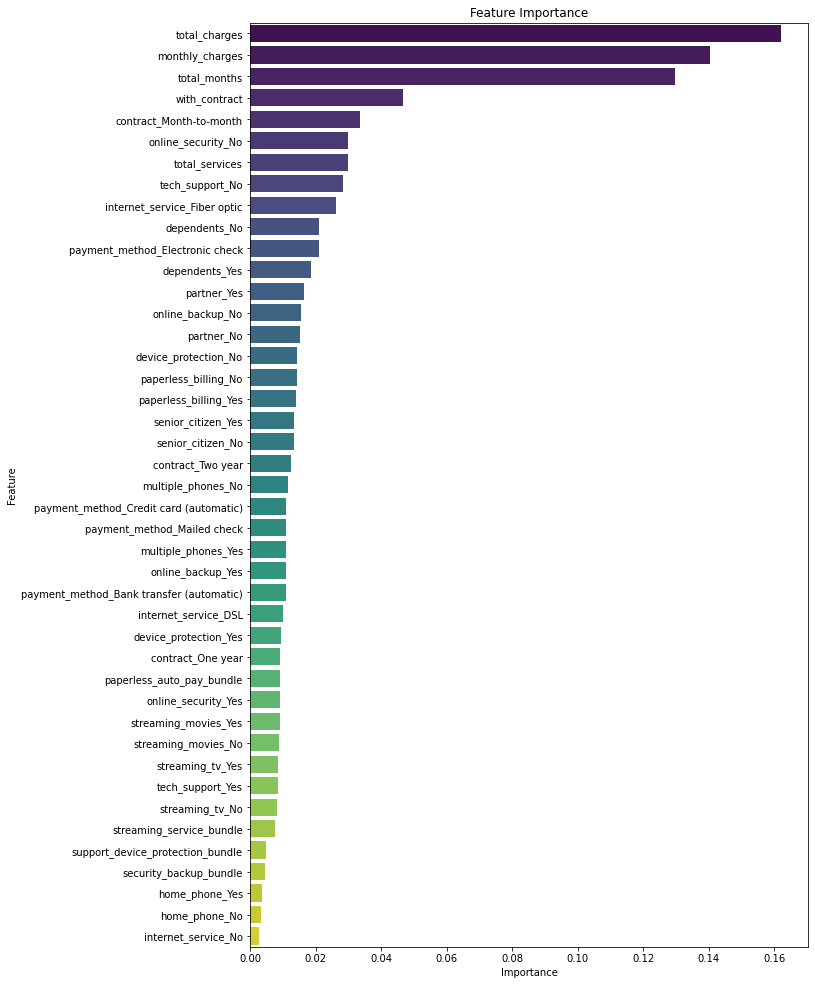

In [68]:
subset_model = RandomForestClassifier(random_state=42)

subset_model.fit(fe_client_attributes, client_label)

feature_importances = subset_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': fe_client_attributes.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 17))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

In [69]:
top_features = feature_importance_df.head(15)['Feature']

subset_attributes = fe_client_attributes[top_features]
subset_attributes.head()

,total_charges,monthly_charges,total_months,with_contract,contract_Month-to-month,online_security_No,total_services,tech_support_No,internet_service_Fiber optic,dependents_No,payment_method_Electronic check,dependents_Yes,partner_Yes,online_backup_No,partner_No
customer_id,,,,,,,,,,,,,,,
3668-QPYBK,108.15,53.85,2,0,1,0,3,1,0,1,0,0,0,0,1
9237-HQITU,151.65,70.70,2,0,1,1,1,1,1,0,1,1,0,1,1
9305-CDSKC,820.50,99.65,8,0,1,1,5,1,1,0,1,1,0,1,1
7892-POOKP,3046.05,104.80,28,0,1,1,6,0,1,0,1,1,1,1,0
0280-XJGEX,5036.30,103.70,49,0,1,1,6,1,1,0,0,1,0,0,1


In [70]:
c_variables = ['total_charges', 'monthly_charges', 'total_months', 'total_services']

scaler = StandardScaler()
subset_attributes[c_variables] = scaler.fit_transform(subset_attributes[c_variables])

C:\Users\Gaming PC\AppData\Local\Temp\ipykernel_5532\3949015717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_attributes[c_variables] = scaler.fit_transform(subset_attributes[c_variables])


In [71]:
subset_attributes.head()

,total_charges,monthly_charges,total_months,with_contract,contract_Month-to-month,online_security_No,total_services,tech_support_No,internet_service_Fiber optic,dependents_No,payment_method_Electronic check,dependents_Yes,partner_Yes,online_backup_No,partner_No
customer_id,,,,,,,,,,,,,,,
3668-QPYBK,-0.958066,-0.362660,-1.236724,0,1,0,-0.176011,1,0,1,0,0,0,0,1
9237-HQITU,-0.938874,0.197365,-1.236724,0,1,1,-1.145997,1,1,0,1,1,0,1,1
9305-CDSKC,-0.643789,1.159546,-0.992402,0,1,1,0.793976,1,1,0,1,1,0,1,1
7892-POOKP,0.338085,1.330711,-0.177995,0,1,1,1.278969,0,1,0,1,1,1,1,0
0280-XJGEX,1.216150,1.294151,0.677133,0,1,1,1.278969,1,1,0,0,1,0,0,1


In [72]:
subset_attributes_train, subset_attributes_test, client_label_train, client_label_test = train_test_split(
    subset_attributes, client_label, train_size=0.8, test_size=0.2, random_state=42, stratify=client_label
)

subset_attributes_train.shape, subset_attributes_test.shape, client_label_train.shape, client_label_test.shape

((5634, 15), (1409, 15), (5634,), (1409,))

### 7.3. Test attributes  <a class="anchor" id="Test"></a>

In [73]:
subset_model = RandomForestClassifier(
    n_estimators = 100,
     criterion =  "entropy",
     max_depth =  5,
     min_samples_split =  10
)

subset_model.fit(subset_attributes_train, client_label_train)

subset_attributes_train_pred = subset_model.predict(subset_attributes_train)
subset_attributes_test_pred = subset_model.predict(subset_attributes_test)

train_class_report = classification_report(client_label_train, subset_attributes_train_pred)
print("Classification Report - Training Set:")
print(train_class_report)

test_class_report = classification_report(client_label_test, subset_attributes_test_pred)
print("Classification Report - Test Set:")
print(test_class_report)

Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4139
           1       0.68      0.54      0.60      1495

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



After testing different combinations with the data based on the new data subset, I didn't find a significantly better solution for our model selection phase. Therefore, I will not use the new attributes in the last step.

## 8. Final models <a class="anchor" id="Final"></a>

We're dedicated to creating an excellent algorithm that finds the sweet spot, avoiding both high variance and high bias. Our main focus is on getting the highest recall possible, so we're putting extra effort into improving and refining this crucial metric. **What is the strategy**, and why are these steps crucial? In the Model Selection, it was observed that when sampling all the data from the minor class to balance the two classes, overfitting occurred in all cases by approximately 10%. Simultaneously, it was noticed that the sampling results were significantly improved. Hence, to address this, I will employ an alternative sampling variant by introducing "sampling_strategy=0.50." This implies that, after resampling, the number of samples in the minority class will be half of the number of samples in the majority class.

In [74]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(17, 5))
    plt.title("Learning Curve", fontsize=15)
    plt.xlabel("Training Examples", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', 
             label="Training score", color="blue")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', 
             label="Cross-validation score", color="black")

    plt.axhline(y=0.80, color='red', linestyle='--', 
                label=f'Desired Performance 0.80')

    plt.legend(loc="best")
    plt.show()

* The learning_curve function divides the dataset into k folds (in this case, 5).
* It iterates over these folds, using each one as a validation set while training the model on the remaining k-1 folds.
* For each training set size (specified by train_sizes), it computes the training and cross-validation scores.

In [75]:
ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)
client_attributes_resampled, client_label_resampled = ros.fit_resample(client_attributes_train, client_label_train)
client_attributes_resampled.shape, client_label_resampled.shape

((6208, 46), (6208,))

### 8.1. Logistic Regression <a class="anchor" id="Logistic_two"></a>

In [76]:
lr_best_params = {
    'C': [10],
    'penalty': ['l1', 'l2'],
    "fit_intercept": [True],
    'max_iter': [100],
    'solver': ['lbfgs']
}

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Best Hyperparameters: {'C': 10, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.58      0.65      0.62       374

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      4139
           1       0.70      0.67      0.68      2069

    accuracy                           0.79      6208
   macro avg       0.77      0.76      0.77      6208
weighted avg       0.79      0.79      0.79      6208



C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Cross-Validation Recall Scores: [0.66425121 0.66425121 0.68357488 0.66101695 0.68115942]
Cross-Validation Mean Recall Score: 0.6708507328256775


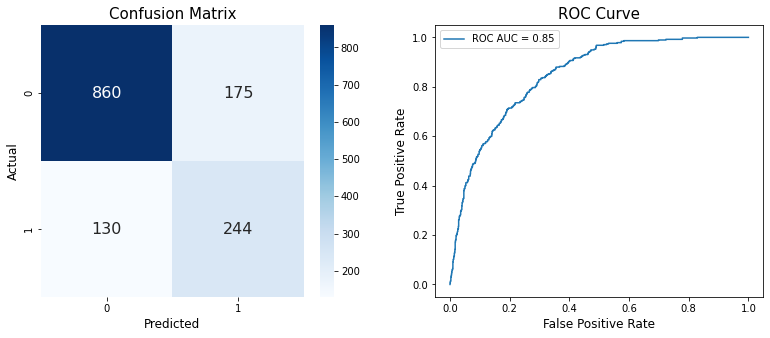

In [77]:
lr_best_model, lr_classification_report = train_and_evaluate_model(
    LogisticRegression(), lr_best_params, client_attributes_resampled, client_label_resampled
)

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

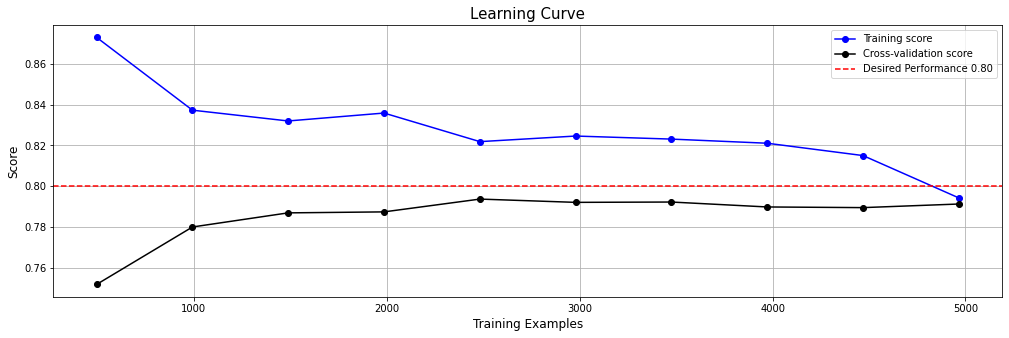

In [78]:
plot_learning_curve(lr_best_model, client_attributes_resampled, client_label_resampled)

* The training and validation curves are converging, indicating no significant overfitting or underfitting.
* The cross-validation mean recall score is approximately 67%, suggesting consistency in the model's performance across different subsets of the data.
* The learning curve indicates that the model performance has stabilized with increasing data. The test scores are relatively stable, showing that the model is not suffering from high variance or overfitting.

### 8.2. Support Vector Machines: <a class="anchor" id="SVM_two"></a>

In [79]:
svc_best_params = {
    "C": [1],
    "kernel": ['linear'],
}

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.58      0.64      0.61       374

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      4139
           1       0.70      0.67      0.68      2069

    accuracy                           0.79      6208
   macro avg       0.77      0.76      0.76      6208
weighted avg       0.79      0.79      0.79      6208

Cross-Validation Recall Scores: [0.66425121 0.67874396 0.64975845 0.67070218 0.64251208]
Cross-Validation Mean Recall Score: 0.6611935759319694


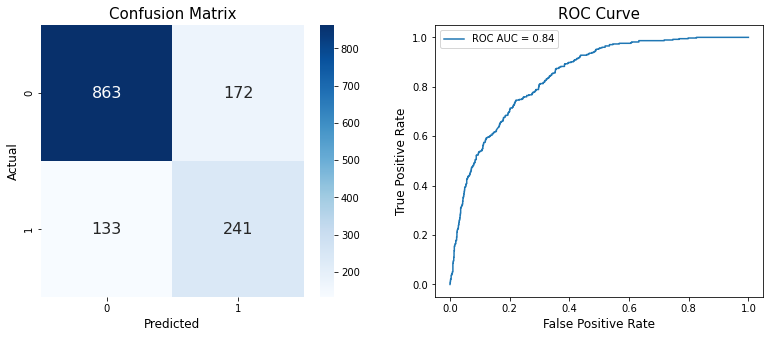

In [80]:
svc_best_model, svc_best_classification_report = train_and_evaluate_model(
    SVC(probability=True), svc_best_params, client_attributes_resampled, client_label_resampled
)

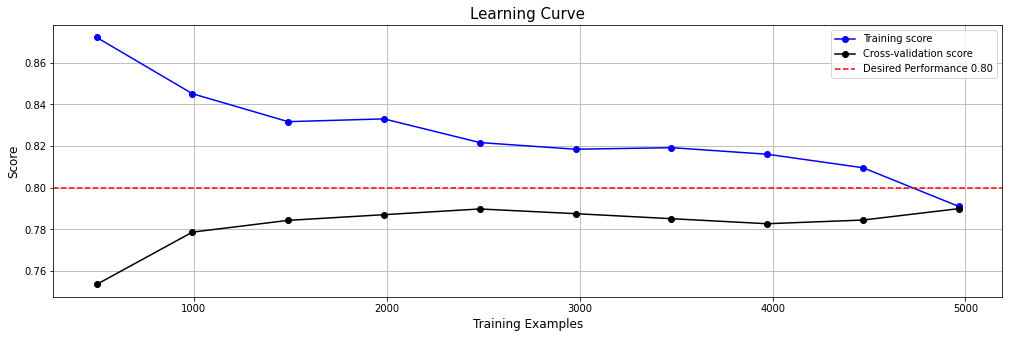

In [81]:
plot_learning_curve(svc_best_model, client_attributes_resampled, client_label_resampled)

* The SVM model shows similar performance to Logistic Regression.
* The cross-validation mean recall score is approximately 64%, suggesting consistency in the model's performance across different subsets of the data.
* The learning curve suggests that the model is performing well on both training and test sets. The scores stabilize with increasing data, indicating a balanced model.

### 8.3. Random Forest <a class="anchor" id="Forest_two"></a>

In [82]:
rf_best_params = {
    "n_estimators": [1000],
    "criterion": ["entropy"],
    "max_depth": [5],
    "min_samples_split": [10],
    "min_samples_leaf": [10]        
}

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 1000}
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.61      0.64      0.63       374

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.74      1409
weighted avg       0.80      0.80      0.80      1409

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      4139
           1       0.71      0.66      0.68      2069

    accuracy                           0.80      6208
   macro avg       0.77      0.76      0.77      6208
weighted avg       0.79      0.80      0.80      6208

Cross-Validation Recall Scores: [0.65217391 0.647343   0.63768116 0.63922518 0.6352657 ]
Cross-Validation Mean Recall Score: 0.64233778994

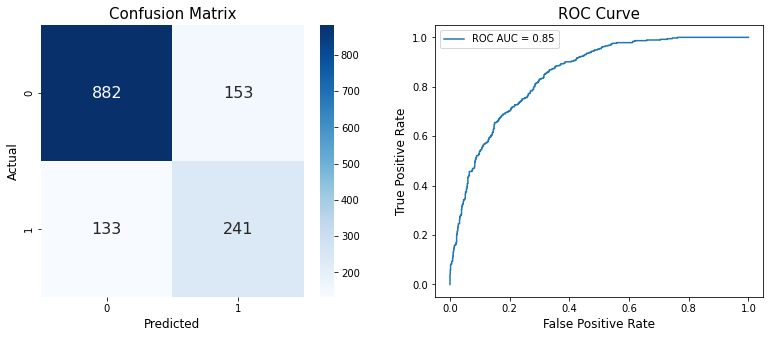

In [83]:
rf_best_model, rf_best_classification_report = train_and_evaluate_model(
    RandomForestClassifier(), rf_best_params, client_attributes_resampled, client_label_resampled
)

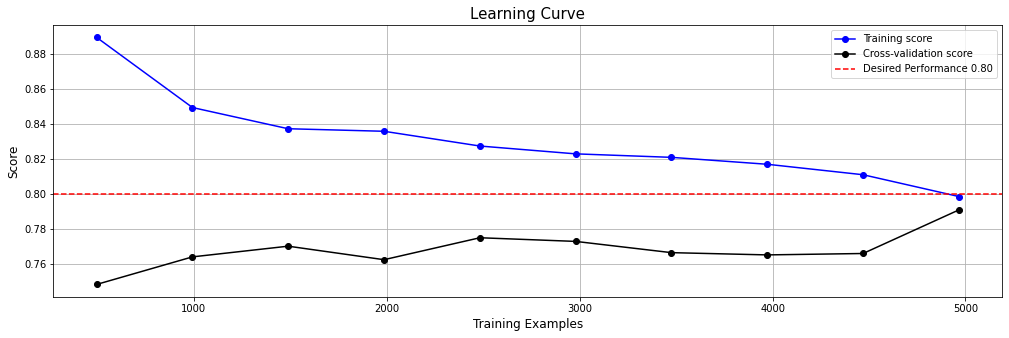

In [84]:
plot_learning_curve(rf_best_model, client_attributes_resampled, client_label_resampled)

* The Random Forest model demonstrates stability and balanced performance on both training and test sets.
* The scores stabilize as the amount of data increases, suggesting that the model is robust and not prone to overfitting.
* The cross-validation mean recall score is approximately 64%, suggesting consistency in the model's performance across different subsets of the data.
* The learning curves for the Random Forest model show consistent performance on both the training and test sets. There is no significant gap between the two curves, indicating a balanced model.

## 9. Conclusion <a class="anchor" id="Conclusion"></a>

In Part 6, various hyperparameters were used across individual models. Drawing from these considerations, we identified the most relevant ones for the project's final phase. Upon closer inspection of the last three algorithms, a significant departure from other oversampling techniques, particularly RandomOverSampler, became apparent. Employing a smaller portion of the data proved effective in mitigating high levels of overfitting. Despite the unbalanced nature of our training set, this approach contributed to higher model estimates.

The last algorithms employed exhibited minimal overfitting, approximately 5-6%. The most notable difference lies in the Precision of class 1, showing a high variation between the training and test sets. While Logistic Regression and Support Vector Machine boast the highest recall scores at 64% and 65%, respectively, the Random Forest emerges as the superior algorithm. This is due to its balanced Precision, Recall, and F1 levels. Additionally, the ROC AUC curve, registering at 85% for the Random Forest, outperforms the first two models at 84%. I believe the models demonstrate stability, emphasizing our initial focus on reducing False Negatives to capture as many positive instances as possible.

While the results are promising, there remains room for improvement in future iterations of the project. 

Therefore, the project stands open for further development.

## 10. References <a class="anchor" id="References"></a>

* [Telco customer churn: IBM dataset](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset/data)

* [Customer Churn Prediction - Abstract](https://ieeexplore.ieee.org/abstract/document/6329952)

* [Huijgevoort, C., & Dijkman, R. (2015)](https://pure.tue.nl/ws/portalfiles/portal/47019808)
* [Plotting Learning Curves (scikit-learn)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)